
#### Applying a classification algorithm into real world data with the purpose of identifying whether someone makes over 50k euros a year or not.
Dataset acquired from: https://archive.ics.uci.edu/ml/datasets/Adult

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
##
from sklearn.model_selection import train_test_split
from sklearn import tree
##
from sklearn.neighbors import KNeighborsClassifier
##
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
##
from sklearn.ensemble import RandomForestClassifier

## Insertion of the dataset and data exploration.

### Making two copies of the same dataset.

In [ ]:
ab=pd.read_csv('data/adult.csv',';')

In [3]:
ba=pd.read_csv('data/adult.csv',';')

##### Checking for null values.

In [4]:
ab.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
money             False
dtype: bool

##### Showing dataset's shape.

In [5]:
ab.shape

(32561, 15)

In [6]:
ba.shape

(32561, 15)

##### Showing the first five entries of the dataset.

In [7]:
ab.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,money
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##### Column names.

In [8]:
ab.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'money'],
      dtype='object')

##### Replacing the values of type Object with unique int32 values and creating a new column with those values to assist later into the data analysis of the dataset. This procedure is done on both tables.

In [9]:
workclassString = ab.workclass
workclassVal = ab.workclass.unique()
workclassValCount = len(workclassVal)
workclass_dict = {}
for i in range(0,workclassValCount):
    workclass_dict[workclassVal[i]] = i
ab["workclass_c"] = ab.workclass.map(workclass_dict).astype(int)
############################################################
workclassString = ba.workclass
workclassVal = ba.workclass.unique()
workclassValCount = len(workclassVal)
workclass_dict = {}
for i in range(0,workclassValCount):
    workclass_dict[workclassVal[i]] = i
ba["workclass_c"] = ba.workclass.map(workclass_dict).astype(int)

In [10]:
educationString = ab.education
educationVal = ab.education.unique()
educationValCount = len(educationVal)
education_dict = {}
for i in range(0,educationValCount):
    education_dict[educationVal[i]] = i
ab["education_c"] = ab.education.map(education_dict).astype(int)
############################################################
educationString = ba.education
educationVal = ba.education.unique()
educationValCount = len(educationVal)
education_dict = {}
for i in range(0,educationValCount):
    education_dict[educationVal[i]] = i
ba["education_c"] = ba.education.map(education_dict).astype(int)

In [12]:
marital_statusString = ab["marital-status"]
marital_statusVal = ab["marital-status"].unique()
marital_statusValCount = len(marital_statusVal)
marital_status_dict = {}
for i in range(0,marital_statusValCount):
    marital_status_dict[marital_statusVal[i]] = i
ab["marital_status_c"] = ab["marital-status"].map(marital_status_dict).astype(int)
############################################################
marital_statusString = ba["marital-status"]
marital_statusVal = ba["marital-status"].unique()
marital_statusValCount = len(marital_statusVal)
marital_status_dict = {}
for i in range(0,marital_statusValCount):
    marital_status_dict[marital_statusVal[i]] = i
ba["marital_status_c"] = ba["marital-status"].map(marital_status_dict).astype(int)

In [13]:
occupationString = ab.occupation
occupationVal = ab.occupation.unique()
occupationValCount = len(occupationVal)
occupation_dict = {}
for i in range(0,occupationValCount):
    occupation_dict[occupationVal[i]] = i
ab["occupation_c"] = ab.occupation.map(occupation_dict).astype(int)
############################################################
occupationString = ba.occupation
occupationVal = ba.occupation.unique()
occupationValCount = len(occupationVal)
occupation_dict = {}
for i in range(0,occupationValCount):
    occupation_dict[occupationVal[i]] = i
ba["occupation_c"] = ba.occupation.map(occupation_dict).astype(int)

In [14]:
relationshipString = ab.relationship
relationshipVal = ab.relationship.unique()
relationshipValCount = len(relationshipVal)
relationship_dict = {}
for i in range(0,relationshipValCount):
    relationship_dict[relationshipVal[i]] = i
ab["relationship_c"] = ab.relationship.map(relationship_dict).astype(int)
############################################################
relationshipString = ba.relationship
relationshipVal = ba.relationship.unique()
relationshipValCount = len(relationshipVal)
relationship_dict = {}
for i in range(0,relationshipValCount):
    relationship_dict[relationshipVal[i]] = i
ba["relationship_c"] = ba.relationship.map(relationship_dict).astype(int)

In [15]:
raceString = ab.race
raceVal = ab.race.unique()
raceValCount = len(raceVal)
race_dict = {}
for i in range(0,raceValCount):
    race_dict[raceVal[i]] = i
ab["race_c"] = ab.race.map(race_dict).astype(int)
############################################################
raceString = ba.race
raceVal = ba.race.unique()
raceValCount = len(raceVal)
race_dict = {}
for i in range(0,raceValCount):
    race_dict[raceVal[i]] = i
ba["race_c"] = ba.race.map(race_dict).astype(int)

In [16]:
sexString = ab.sex
sexVal = ab.sex.unique()
sexValCount = len(sexVal)
sex_dict = {}
for i in range(0,sexValCount):
    sex_dict[sexVal[i]] = i
ab["sex_c"] = ab.sex.map(sex_dict).astype(int)
############################################################
sexString = ba.sex
sexVal = ba.sex.unique()
sexValCount = len(sexVal)
sex_dict = {}
for i in range(0,sexValCount):
    sex_dict[sexVal[i]] = i
ba["sex_c"] = ba.sex.map(sex_dict).astype(int)

In [17]:
moneyString = ab.money
moneyVal = ab.money.unique()
moneyValCount = len(moneyVal)
money_dict = {}
for i in range(0,moneyValCount):
    money_dict[moneyVal[i]] = i
ab["money_c"] = ab.money.map(money_dict).astype(int)
############################################################
moneyString = ba.money
moneyVal = ba.money.unique()
moneyValCount = len(moneyVal)
money_dict = {}
for i in range(0,moneyValCount):
    money_dict[moneyVal[i]] = i
ba["money_c"] = ba.money.map(money_dict).astype(int)

##### Making column names easier to handle. 

In [18]:
ab.rename(columns={'marital-status':'marital_status'}, inplace=True)
ab.rename(columns={'education-num':'education_num'}, inplace=True)
ab.rename(columns={'capital-gain':'capital_gain'}, inplace=True)
ab.rename(columns={'capital-loss':'capital_loss'}, inplace=True)
ab.rename(columns={'hours-per-week':'hours_per_week'}, inplace=True)
ab.rename(columns={'native-country':'native_country'}, inplace=True)
############################################################
ba.rename(columns={'marital-status':'marital_status'}, inplace=True)
ba.rename(columns={'education-num':'education_num'}, inplace=True)
ba.rename(columns={'capital-gain':'capital_gain'}, inplace=True)
ba.rename(columns={'capital-loss':'capital_loss'}, inplace=True)
ba.rename(columns={'hours-per-week':'hours_per_week'}, inplace=True)
ba.rename(columns={'native-country':'native_country'}, inplace=True)

##### Showing the reformed tables.

In [19]:
ab.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,native_country,money,workclass_c,education_c,marital_status_c,occupation_c,relationship_c,race_c,sex_c,money_c
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,United-States,<=50K,0,0,0,0,0,0,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,United-States,<=50K,1,0,1,1,1,0,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,United-States,<=50K,2,1,2,2,0,0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,United-States,<=50K,2,2,1,2,1,1,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,Cuba,<=50K,2,0,1,3,2,1,1,0


In [20]:
ab.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'money', 'workclass_c', 'education_c', 'marital_status_c',
       'occupation_c', 'relationship_c', 'race_c', 'sex_c', 'money_c'],
      dtype='object')

In [21]:
ab.dtypes

age                  int64
workclass           object
fnlwgt               int64
education           object
education_num        int64
marital_status      object
occupation          object
relationship        object
race                object
sex                 object
capital_gain         int64
capital_loss         int64
hours_per_week       int64
native_country      object
money               object
workclass_c          int32
education_c          int32
marital_status_c     int32
occupation_c         int32
relationship_c       int32
race_c               int32
sex_c                int32
money_c              int32
dtype: object

##### Deleting unnecessary columns.

In [22]:
ab.drop(labels = ['fnlwgt'], axis = 1, inplace = True)

In [23]:
ab.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,...,native_country,money,workclass_c,education_c,marital_status_c,occupation_c,relationship_c,race_c,sex_c,money_c
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,...,United-States,<=50K,0,0,0,0,0,0,0,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,United-States,<=50K,1,0,1,1,1,0,0,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,United-States,<=50K,2,1,2,2,0,0,0,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,United-States,<=50K,2,2,1,2,1,1,0,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,...,Cuba,<=50K,2,0,1,3,2,1,1,0


In [24]:
ba.drop(labels = ['fnlwgt','workclass','education','marital_status','occupation','relationship','race','sex',
                  'native_country','money'],axis = 1, inplace=True)

In [25]:
ba.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_c,education_c,marital_status_c,occupation_c,relationship_c,race_c,sex_c,money_c
0,39,13,2174,0,40,0,0,0,0,0,0,0,0
1,50,13,0,0,13,1,0,1,1,1,0,0,0
2,38,9,0,0,40,2,1,2,2,0,0,0,0
3,53,7,0,0,40,2,2,1,2,1,1,0,0
4,28,13,0,0,40,2,0,1,3,2,1,1,0


In [26]:
ba.columns

Index(['age', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_c', 'education_c', 'marital_status_c',
       'occupation_c', 'relationship_c', 'race_c', 'sex_c', 'money_c'],
      dtype='object')

##### Data visualization through a histogram.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education_num'}>,
        <AxesSubplot:title={'center':'capital_gain'}>,
        <AxesSubplot:title={'center':'capital_loss'}>],
       [<AxesSubplot:title={'center':'hours_per_week'}>,
        <AxesSubplot:title={'center':'workclass_c'}>,
        <AxesSubplot:title={'center':'education_c'}>,
        <AxesSubplot:title={'center':'marital_status_c'}>],
       [<AxesSubplot:title={'center':'occupation_c'}>,
        <AxesSubplot:title={'center':'relationship_c'}>,
        <AxesSubplot:title={'center':'race_c'}>,
        <AxesSubplot:title={'center':'sex_c'}>],
       [<AxesSubplot:title={'center':'money_c'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

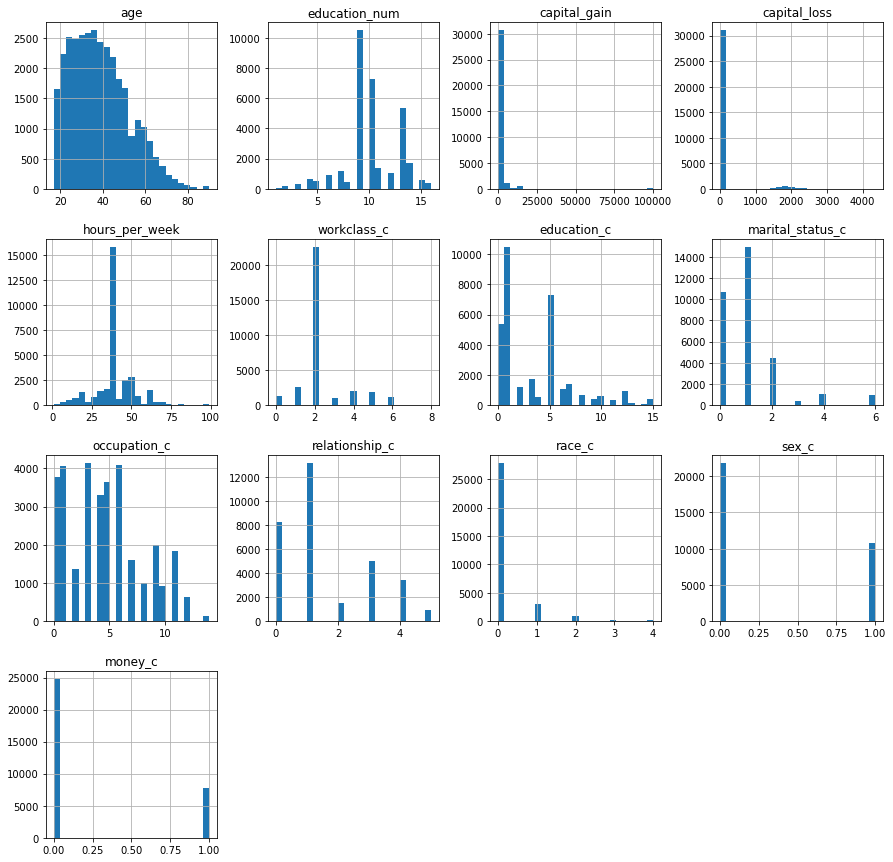

In [27]:
ba.hist(bins=25, figsize=(15, 15))

### Data splitting.

##### A correlation matrix too assist me into picking the right "in's" for my purposes.

<AxesSubplot:>

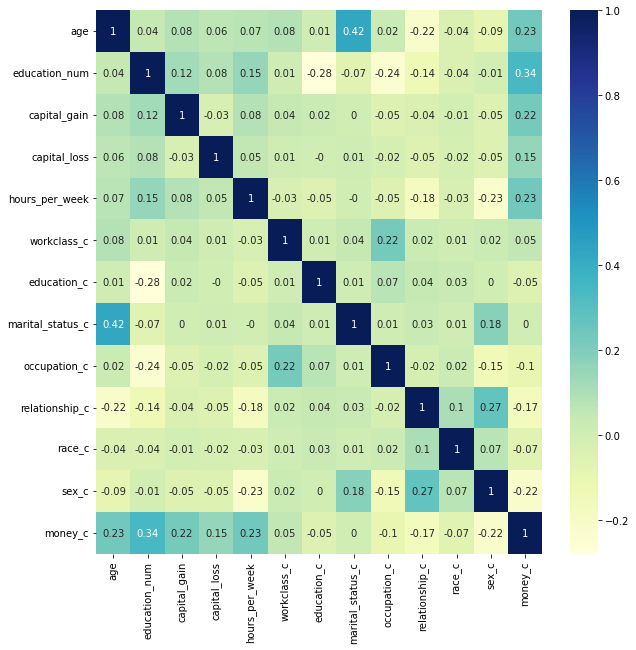

In [28]:
correlation_matrix = ba.corr().round(2)
f, ax = plt.subplots(figsize=(10,10))
#### Χρήση απεικόνισης μορφής heatmap της βιβλιοθήκης seaborn 
sns.heatmap(data=correlation_matrix, annot=True,cmap='YlGnBu')

##### My y_vector is "money_c". My x_vector contains all those column with a correlation percentage >=0.22. 

In [29]:
X = ba[['education_num', 'capital_gain', 'hours_per_week','age']]
y= ba['money_c']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 17)

In [30]:
print("X_train dimensions:", X_train.shape)
print("y_train dimensions:", y_train.shape)

print("X_test dimensions:", X_test.shape)
print("y_test dimensions:", y_test.shape)

X_train dimensions: (22792, 4)
y_train dimensions: (22792,)
X_test dimensions: (9769, 4)
y_test dimensions: (9769,)


### Choosing the classification algrorithm: Decision Tree Classifier.

In [ ]:
dtree = tree.DecisionTreeClassifier("gini")

#### Training the model.

In [32]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
y_pred = dtree.predict(X_test)

In [34]:
type(y_pred)

numpy.ndarray

In [35]:
print("Classification's percentage of success:")
print(np.sum(y_pred == y_test) / float(len(y_test)))

Classification's percentage of success:
0.7984440577336472


##### Even though the percentage was good enough it is still worth checking other algorithms.
##### (Changing the method from gini to entropy did not change the percentage)

### KNN Classifier

In [37]:
knnClass = KNeighborsClassifier(n_neighbors=7)

In [38]:
knnClass.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [39]:
y_pred = knnClass.predict(X_test)

In [40]:
print("Classification's percentage of success:")
print(np.sum(y_pred == y_test) / float(len(y_test)))

Classification's percentage of success:
0.813798751151602


##### We are getting a better percentage of classifaction (0.82 instead of 0.81) having 8 neighbours instead of 7, but keeping in mind that we don't want to overfit our model, we are keeping it as is.

In [41]:
confusion_matrix(y_test, y_pred)

array([[6796,  593],
       [1226, 1154]], dtype=int64)

##### Precision can take prices from 1 to 0 (while 1 is the best we can get)
##### Ours is 0.66, so that's quite good.

In [42]:
precision_score(y_test, y_pred)

0.6605609616485404

##### Same goes for our recall value, but here we can see that our classifier is not that good in pointing out the true positive samples, with a value of 0.48.

In [43]:
recall_score(y_test, y_pred) 

0.48487394957983193

In [44]:
f1_score(y_test, y_pred)

0.5592440029076812

### Applying Random Forest Classifier

In [46]:
rfc = RandomForestClassifier(n_estimators=250)

In [47]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250)

In [48]:
y_pred = rfc.predict(X_test)

In [49]:
confusion_matrix(y_test, y_pred)

array([[6822,  567],
       [1308, 1072]], dtype=int64)

##### Slightly worse percentage of success and so far KNN looks better.

In [50]:
print("Classification's percentage of success:")
print(np.sum(y_pred == y_test) / float(len(y_test)))

Classification's percentage of success:
0.8080663322755656


In [51]:
f1_score(y_test, y_pred)

0.5334660363274446

In [52]:
rfc.feature_importances_

array([0.20896463, 0.25024567, 0.20083775, 0.33995196])

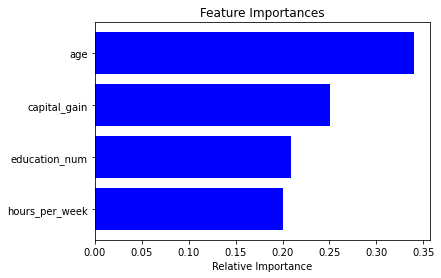

In [53]:
features = ['education_num', 'capital_gain', 'hours_per_week', 'age']
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Having tried three different classification algorithms we can confidently say that KNN performed better.